Example of anomaly detection using symmetric Variational Autoencoder as in
 Pu, Yunchen, et al. "Symmetric variational autoencoder and connections to adversarial learning." arXiv preprint arXiv:1709.01846 (2017).

In [1]:
using PyPlot, JLD, AnomalyDetection, EvalCurves
import PyPlot: plot
include("./plots.jl")

PyPlot.plot

In [2]:
# load data
dataset = load("toy_data_3.jld")["data"]
X = AnomalyDetection.Float.(dataset.data)
Y = dataset.labels;
nX = X[:,Y.==0]

2×90 Array{Float32,2}:
 0.803442  0.804605  0.807145  0.819485  …  0.0350314  0.0613807  0.0685027
 0.821998  0.834235  0.826129  0.848182     0.973926   1.00745    0.973256 

In [3]:
# sVAE settings
indim = size(X,1)
hiddendim = 10
latentdim = 2
nlayers = 2
N = size(nX,2)

# setup the VAE object
ensize = [indim; hiddendim; hiddendim; latentdim*2] # encoder architecture
decsize = [latentdim; hiddendim; hiddendim; indim] # decoder architecture
dissize = [indim + latentdim; hiddendim; hiddendim; 1] # discriminator architecture
lambda = 0.0 # weight of the data error term
threshold = 0 # classification threshold, is recomputed during fit!()
contamination = size(Y[Y.==1],1)/size(Y, 1) # for automatic threshold computation
iterations = 10000
cbit = 5000 # after this number of iteratiosn, callback is printed
batchsize = 50 # batchsize 
nepochs = Int(ceil(batchsize*iterations/size(nX,2))) # if this is supplied, do epoch training
verbfit = true
M = 1 #  number of samples of X in reconstruction error
activation = Flux.relu
layer = Flux.Dense
rdelta = 1e-4 # reconstruction error threshold for training stopping
alpha = 0.5 # weighs between reconstruction error and discriminator score for classification
# 0 = only reconstruction error, 1 = only discriminator score
Beta = 1.0 # for automatic threshold computation, in [0, 1] 
# 1.0 = tight around normal samples
tracked = true # do you want to store training progress?
# it can be later retrieved from model.traindata
xsigma = 1.0 # static estimate of data variance
eta = 0.001
model = sVAEmodel(ensize, decsize, dissize; lambda=lambda, threshold=threshold, 
    contamination=contamination, iterations=iterations, cbit=cbit, nepochs = nepochs,
    verbfit=verbfit, batchsize=batchsize, 
    M = M, activation = activation, rdelta = rdelta, Beta = Beta, xsigma = xsigma,
    tracked = tracked, layer = layer, eta = eta)

AnomalyDetection.sVAEmodel(AnomalyDetection.sVAE(Chain(Dense(2, 10, NNlib.relu), Dense(10, 10, NNlib.relu), Dense(10, 4)), AnomalyDetection.sample_z, Chain(Dense(2, 10, NNlib.relu), Dense(10, 10, NNlib.relu), Dense(10, 2)), Chain(Dense(4, 10, NNlib.relu), Dense(10, 10, NNlib.relu), Dense(10, 1)), Chain(Dense(4, 10, NNlib.relu), Dense(10, 10, NNlib.relu), Dense(10, 1))), 0.0, 0, 0.1262135922330097, 10000, 5000, 5556, 50, 1, true, 0.0001, 0.5, 1.0, 1.0, MVHistory{ValueHistories.History}, 0.001)

In [4]:
# fit the model
AnomalyDetection.evalloss(model, nX)
AnomalyDetection.fit!(model, nX)
AnomalyDetection.evalloss(model, nX)

discriminator loss: 1.4631517
VAE loss: -0.16949363
reconstruction error: 0.6340296114933994



Progress:   0%|                                         |  ETA: 19:20:32
  discriminator loss:    1.4777383
  vae loss:              -0.13494846
Progress:   0%|                                         |  ETA: 0:29:16
  discriminator loss:    1.2545376
  vae loss:              0.31866914
Progress:   1%|                                         |  ETA: 0:21:41
  discriminator loss:    1.143306
  vae loss:              0.5412608
Progress:   1%|                                         |  ETA: 0:17:27
  discriminator loss:    1.162821
  vae loss:              0.7209554
Progress:   1%|                                         |  ETA: 0:14:39
  discriminator loss:    1.1390957
  vae loss:              0.5209822
Progress:   1%|                                         |  ETA: 0:12:38
  discriminator loss:    1.3077817
  vae loss:              0.15615903
Progress:   1%|█                                        |  ETA: 0:11:16
  discriminator loss:    1.5799307
  vae loss:              -0.29799384
P

Progress:   9%|████                                     |  ETA: 0:03:53
  discriminator loss:    1.4030118
  vae loss:              -0.022536129
Progress:   9%|████                                     |  ETA: 0:03:51
  discriminator loss:    1.3249326
  vae loss:              0.13180202
Progress:   9%|████                                     |  ETA: 0:03:49
  discriminator loss:    1.4116755
  vae loss:              0.043473035
Progress:   9%|████                                     |  ETA: 0:03:47
  discriminator loss:    1.4021957
  vae loss:              -0.043702476
Progress:   9%|████                                     |  ETA: 0:03:45
  discriminator loss:    1.37993
  vae loss:              0.0929776
Progress:  10%|████                                     |  ETA: 0:03:44
  discriminator loss:    1.3978451
  vae loss:              -0.03241168
Progress:  10%|████                                     |  ETA: 0:03:41
  discriminator loss:    1.4415643
  vae loss:              -0.0836

Progress:  18%|███████                                  |  ETA: 0:02:53
  discriminator loss:    1.3499942
  vae loss:              0.06684652
Progress:  18%|███████                                  |  ETA: 0:02:52
  discriminator loss:    1.3517293
  vae loss:              0.065245196
Progress:  18%|███████                                  |  ETA: 0:02:51
  discriminator loss:    1.3803078
  vae loss:              0.060753
Progress:  18%|███████                                  |  ETA: 0:02:49
  discriminator loss:    1.4263
  vae loss:              0.011077266
Progress:  18%|████████                                 |  ETA: 0:02:48
  discriminator loss:    1.3220253
  vae loss:              0.17915192
Progress:  19%|████████                                 |  ETA: 0:02:48
  discriminator loss:    1.3121114
  vae loss:              0.18919098
Progress:  19%|████████                                 |  ETA: 0:02:47
  discriminator loss:    1.3211353
  vae loss:              0.10571905
Pr

Progress:  26%|███████████                              |  ETA: 0:02:25
  discriminator loss:    1.3743237
  vae loss:              0.07957121
Progress:  26%|███████████                              |  ETA: 0:02:24
  discriminator loss:    1.3238411
  vae loss:              0.10894662
Progress:  27%|███████████                              |  ETA: 0:02:24
  discriminator loss:    1.2972717
  vae loss:              0.21918464
Progress:  27%|███████████                              |  ETA: 0:02:23
  discriminator loss:    1.3440828
  vae loss:              0.14288452
Progress:  27%|███████████                              |  ETA: 0:02:22
  discriminator loss:    1.3535177
  vae loss:              0.05462663
Progress:  27%|███████████                              |  ETA: 0:02:22
  discriminator loss:    1.2388594
  vae loss:              0.21732435
Progress:  27%|███████████                              |  ETA: 0:02:21
  discriminator loss:    1.1946337
  vae loss:              0.5553786


Progress:  35%|██████████████                           |  ETA: 0:02:04
  discriminator loss:    1.3640616
  vae loss:              0.15073514
Progress:  35%|██████████████                           |  ETA: 0:02:04
  discriminator loss:    1.3227401
  vae loss:              0.2777844
Progress:  35%|██████████████                           |  ETA: 0:02:03
  discriminator loss:    1.2652144
  vae loss:              0.48979306
Progress:  35%|██████████████                           |  ETA: 0:02:03
  discriminator loss:    1.1833901
  vae loss:              0.5037283
Progress:  35%|███████████████                          |  ETA: 0:02:03
  discriminator loss:    1.2143131
  vae loss:              0.4036715
Progress:  36%|███████████████                          |  ETA: 0:02:02
  discriminator loss:    1.1218915
  vae loss:              0.62661624
Progress:  36%|███████████████                          |  ETA: 0:02:02
  discriminator loss:    1.2027546
  vae loss:              0.57988536
Pr

Progress:  43%|██████████████████                       |  ETA: 0:01:45
  discriminator loss:    1.3451717
  vae loss:              0.25088283
Progress:  44%|██████████████████                       |  ETA: 0:01:44
  discriminator loss:    1.4124961
  vae loss:              0.095447026
Progress:  44%|██████████████████                       |  ETA: 0:01:44
  discriminator loss:    1.2976031
  vae loss:              0.19522451
Progress:  44%|██████████████████                       |  ETA: 0:01:43
  discriminator loss:    1.4211619
  vae loss:              0.07887765
Progress:  44%|██████████████████                       |  ETA: 0:01:43
  discriminator loss:    1.3610294
  vae loss:              0.031026982
Progress:  44%|██████████████████                       |  ETA: 0:01:42
  discriminator loss:    1.3346016
  vae loss:              0.23562443
Progress:  45%|██████████████████                       |  ETA: 0:01:42
  discriminator loss:    1.3367553
  vae loss:              0.088302

Progress:  52%|█████████████████████                    |  ETA: 0:01:28
  discriminator loss:    1.357199
  vae loss:              0.041980717
Progress:  52%|█████████████████████                    |  ETA: 0:01:28
  discriminator loss:    1.3650749
  vae loss:              0.08858719
Progress:  52%|█████████████████████                    |  ETA: 0:01:27
  discriminator loss:    1.3487189
  vae loss:              0.073188074
Progress:  52%|█████████████████████                    |  ETA: 0:01:27
  discriminator loss:    1.3153068
  vae loss:              -0.04021948
Progress:  53%|██████████████████████                   |  ETA: 0:01:27
  discriminator loss:    1.36294
  vae loss:              0.17542349
Progress:  53%|██████████████████████                   |  ETA: 0:01:26
  discriminator loss:    1.3495429
  vae loss:              0.08698938
Progress:  53%|██████████████████████                   |  ETA: 0:01:26
  discriminator loss:    1.3579884
  vae loss:              0.13220087

Progress:  61%|█████████████████████████                |  ETA: 0:01:11
  discriminator loss:    1.3724015
  vae loss:              0.16523466
Progress:  61%|█████████████████████████                |  ETA: 0:01:10
  discriminator loss:    1.3380182
  vae loss:              0.23352957
Progress:  61%|█████████████████████████                |  ETA: 0:01:10
  discriminator loss:    1.2998075
  vae loss:              -0.018730864
Progress:  61%|█████████████████████████                |  ETA: 0:01:09
  discriminator loss:    1.3726029
  vae loss:              0.06510506
Progress:  62%|█████████████████████████                |  ETA: 0:01:09
  discriminator loss:    1.3312987
  vae loss:              0.12200538
Progress:  62%|█████████████████████████                |  ETA: 0:01:08
  discriminator loss:    1.3373872
  vae loss:              0.28171745
Progress:  62%|█████████████████████████                |  ETA: 0:01:08
  discriminator loss:    1.3326768
  vae loss:              0.054309

Progress:  70%|█████████████████████████████            |  ETA: 0:00:53
  discriminator loss:    1.3224127
  vae loss:              0.042245314
Progress:  70%|█████████████████████████████            |  ETA: 0:00:53
  discriminator loss:    1.3275375
  vae loss:              0.14127219
Progress:  70%|█████████████████████████████            |  ETA: 0:00:52
  discriminator loss:    1.3355868
  vae loss:              0.2007663
Progress:  71%|█████████████████████████████            |  ETA: 0:00:52
  discriminator loss:    1.3419096
  vae loss:              0.053362146
Progress:  71%|█████████████████████████████            |  ETA: 0:00:52
  discriminator loss:    1.3781806
  vae loss:              0.22318551
Progress:  71%|█████████████████████████████            |  ETA: 0:00:52
  discriminator loss:    1.3650293
  vae loss:              0.24323946
Progress:  71%|█████████████████████████████            |  ETA: 0:00:51
  discriminator loss:    1.3528206
  vae loss:              0.1395899

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:35
  discriminator loss:    1.2999514
  vae loss:              0.059693716
Progress:  80%|█████████████████████████████████        |  ETA: 0:00:35
  discriminator loss:    1.332644
  vae loss:              0.050690368
Progress:  80%|█████████████████████████████████        |  ETA: 0:00:34
  discriminator loss:    1.3630347
  vae loss:              0.34899408
Progress:  80%|█████████████████████████████████        |  ETA: 0:00:34
  discriminator loss:    1.3333716
  vae loss:              0.012821734
Progress:  81%|█████████████████████████████████        |  ETA: 0:00:33
  discriminator loss:    1.3526666
  vae loss:              0.22508788
Progress:  81%|█████████████████████████████████        |  ETA: 0:00:33
  discriminator loss:    1.4089367
  vae loss:              0.06587091
Progress:  81%|█████████████████████████████████        |  ETA: 0:00:33
  discriminator loss:    1.3959826
  vae loss:              0.169383

Progress:  91%|█████████████████████████████████████    |  ETA: 0:00:16
  discriminator loss:    1.3209546
  vae loss:              0.30127972
Progress:  91%|█████████████████████████████████████    |  ETA: 0:00:15
  discriminator loss:    1.3382602
  vae loss:              0.18951558
Progress:  91%|█████████████████████████████████████    |  ETA: 0:00:15
  discriminator loss:    1.3011229
  vae loss:              0.2560476
Progress:  91%|█████████████████████████████████████    |  ETA: 0:00:14
  discriminator loss:    1.4163556
  vae loss:              0.16158915
Progress:  92%|██████████████████████████████████████   |  ETA: 0:00:14
  discriminator loss:    1.3168112
  vae loss:              0.12677234
Progress:  92%|██████████████████████████████████████   |  ETA: 0:00:14
  discriminator loss:    1.2759824
  vae loss:              0.19532813
Progress:  92%|██████████████████████████████████████   |  ETA: 0:00:13
  discriminator loss:    1.3348958
  vae loss:              0.15513948


discriminator loss: 1.3704138
VAE loss: 0.4089795
reconstruction error: 0.02718201597981004



Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00
  discriminator loss:    1.2522936
  vae loss:              0.21952993
Progress: 100%|█████████████████████████████████████████| Time: 0:02:45
  discriminator loss:    1.32392
  vae loss:              0.23512775
  reconstruction error:  0.0575663373987801


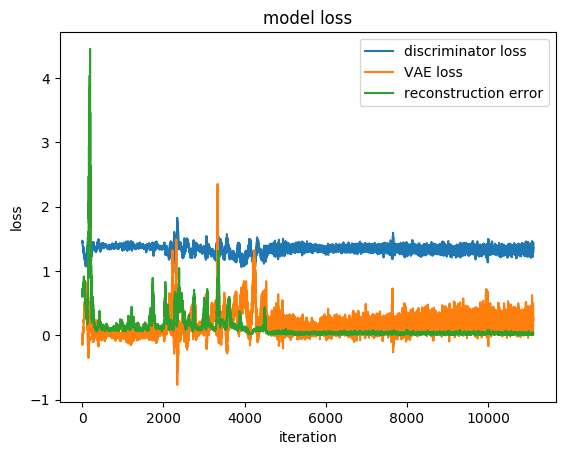

In [5]:
# plot model loss
plot(model)
show()

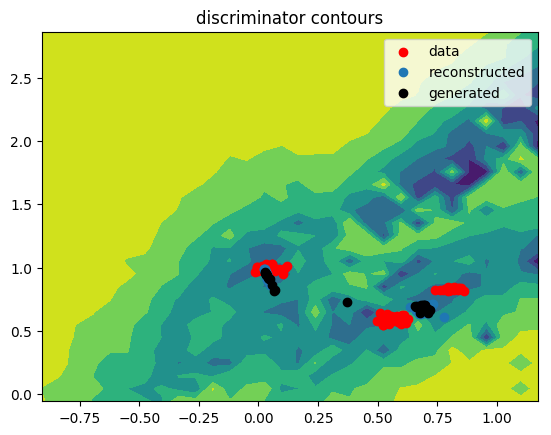

In [6]:
# plot recosntructed and generated samples
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)
Xrec = Flux.Tracker.data(model(X[:, Y.==0]))
Xgen = AnomalyDetection.generate(model, 30)

# also heatmap of the discriminator score
x = linspace(xl[1], xl[2], 30)
y = linspace(yl[1], yl[2], 30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        _x = AnomalyDetection.Float.([x[j], y[i]])
        _z = AnomalyDetection.getcode(model, _x)
        zz[i,j] = Flux.Tracker.data(AnomalyDetection.discriminate(model, _x, _z))[1]
    end
end

f = figure()
contourf(x, y, zz)
scatter(X[1, Y.==0], X[2, Y.==0], c = "r", label = "data")
scatter(Xrec[1,:], Xrec[2,:], label = "reconstructed")
scatter(Xgen[1,:], Xgen[2,:], c = "k", label = "generated")
title("discriminator contours")
xlim(xl)
ylim(yl)
legend()
show()

In [7]:
model(nX)

Tracked 2×90 Array{Float32,2}:
 0.693514  0.717634  0.686873  0.717854  …  0.734703  0.0477433  0.0408943
 0.660955  0.675609  0.702493  0.692456     0.583594  0.883587   0.914672 

In [8]:
nX

2×90 Array{Float32,2}:
 0.803442  0.804605  0.807145  0.819485  …  0.0350314  0.0613807  0.0685027
 0.821998  0.834235  0.826129  0.848182     0.973926   1.00745    0.973256 

In [9]:
AnomalyDetection.mu(model, nX)

Tracked 2×90 Array{Float32,2}:
 -0.0212669  -0.0212669  -0.0212669  …  -0.0154634  -0.0152807  -0.0170214
 -0.609366   -0.609366   -0.609366       0.908767    0.916786    0.84039  

In [10]:
AnomalyDetection.sigma(model, nX)

Tracked 2×90 Array{Float32,2}:
 1.31024   1.31024   1.31024   1.31024   …  1.61708  1.61912   1.59971 
 0.594603  0.594603  0.594603  0.594603     0.45225  0.451711  0.456868

In [11]:
AnomalyDetection.sample_z(model, nX)

Tracked 2×90 Array{Float32,2}:
 -0.696533   1.17376    1.12572  0.429572   …  -3.5774    -1.57562  0.595517
 -0.301341  -0.733854  -1.09043  0.0899698      0.803307   1.22107  1.14631 

In [12]:
# predict labels
AnomalyDetection.setthreshold!(model, X)
model.M = 20 # number of samples - for classification higher is better (more stable)
tryhat = AnomalyDetection.predict(model, X)

103-element Array{Int64,1}:
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 1
 1
 0
 1
 1
 1
 0
 1
 1
 0
 1

In [13]:
AnomalyDetection.anomalyscore(model, X)

103-element Array{Float64,1}:
 0.213368
 0.221736
 0.289143
 0.210295
 0.234866
 0.201414
 0.283919
 0.268837
 0.223987
 0.218788
 0.308749
 0.225596
 0.200838
 ⋮       
 0.307365
 1.55845 
 1.47081 
 0.253221
 1.13331 
 0.339235
 0.790931
 0.280496
 0.652343
 0.536415
 0.340239
 0.356052

In [14]:
# get the labels and roc stats
tryhat, tstyhat = AnomalyDetection.rocstats(dataset, dataset, model);


 Training data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 6
  tn = 88
  fp = 2
  fn = 7
precision: 0.75
f1score: 0.5714285714285714
recall: 0.46153846153846156
false positive rate: 0.022222222222222223
equal error rate: 0.28034188034188035

 Testing data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 7
  tn = 89
  fp = 1
  fn = 6
precision: 0.875
f1score: 0.6666666666666666
recall: 0.5384615384615384
false positive rate: 0.011111111111111112
equal error rate: 0.23632478632478635


In [15]:
# anomaly score contour plot
# get limits of the figure
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)

# compute the anomaly score on a grid
x = linspace(xl[1], xl[2], 30)
y = linspace(yl[1], yl[2], 30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        zz[i,j] = AnomalyDetection.anomalyscore(model, AnomalyDetection.Float.([x[j], y[i]]))
    end
end

# also generate some samples
xgen = AnomalyDetection.generate(model, 3);

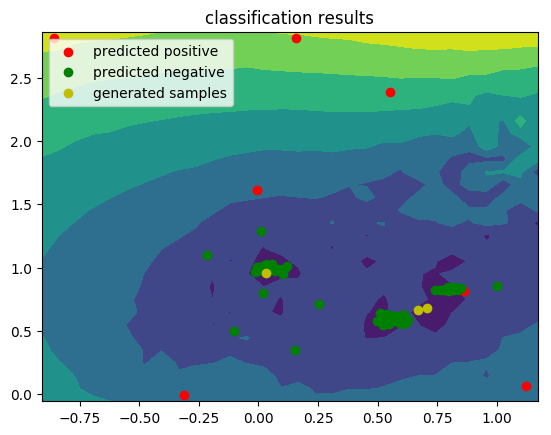

In [16]:
# plot it all
f = figure()
contourf(x, y, zz)
scatter(X[1, tryhat.==1], X[2, tryhat.==1], c = "r", 
    label = "predicted positive")
scatter(X[1, tryhat.==0], X[2, tryhat.==0], c = "g", 
    label = "predicted negative")
scatter(xgen[1,:], xgen[2, :], c = "y", 
    label = "generated samples")
title("classification results")
xlim(xl)
ylim(yl)
legend()
show()

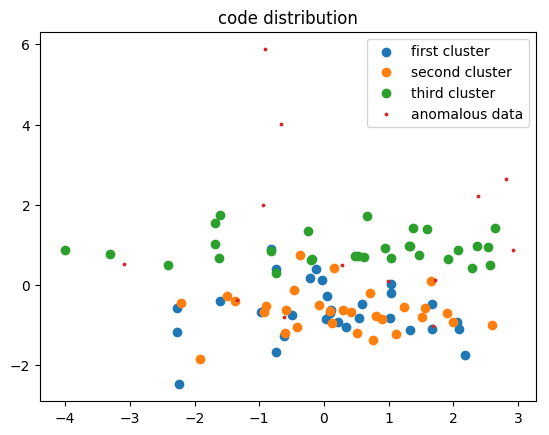

In [17]:
# what are the codes?
z1 = AnomalyDetection.getcode(model, X[:,1:30]).data
z2 = AnomalyDetection.getcode(model, X[:,31:60]).data
z3 = AnomalyDetection.getcode(model, X[:,61:90]).data
za = AnomalyDetection.getcode(model, X[:,91:end]).data

figure()
title("code distribution")
scatter(z1[1,:], z1[2,:], label = "first cluster")
scatter(z2[1,:], z2[2,:], label = "second cluster")
scatter(z3[1,:], z3[2,:], label = "third cluster")
scatter(za[1,:], za[2,:], s = 3, label = "anomalous data")
legend()
show()

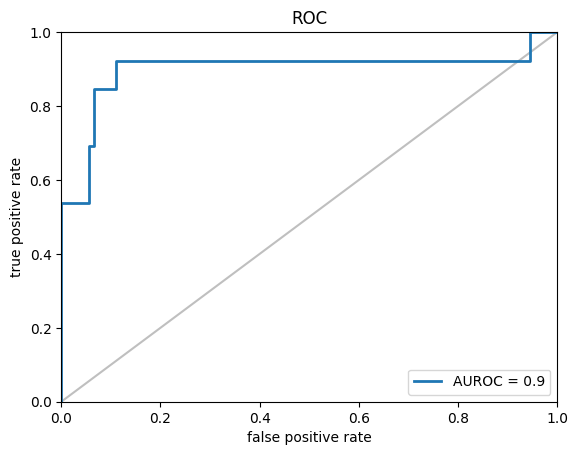

In [18]:
# plot ROC curve and compute AUROC score
ascore = AnomalyDetection.anomalyscore(model, X);
fprvec, tprvec = EvalCurves.roccurve(ascore, Y)
auroc = round(EvalCurves.auc(fprvec, tprvec),3)
EvalCurves.plotroc((fprvec, tprvec, "AUROC = $(auroc)"))
show()

In [19]:
using MLBase: false_positive_rate, false_negative_rate
n = 21
alphavec = linspace(0,1,n)
eervec = zeros(n)
for i in 1:n
    model.alpha = alphavec[i]
    AnomalyDetection.setthreshold!(model, X)
    tryhat, tsthat, trroc, tstroc = AnomalyDetection.rocstats(dataset.data, dataset.labels,
        dataset.data, dataset.labels, model, verb = false)
    eervec[i] = (false_positive_rate(tstroc) + false_negative_rate(tstroc))/2
end

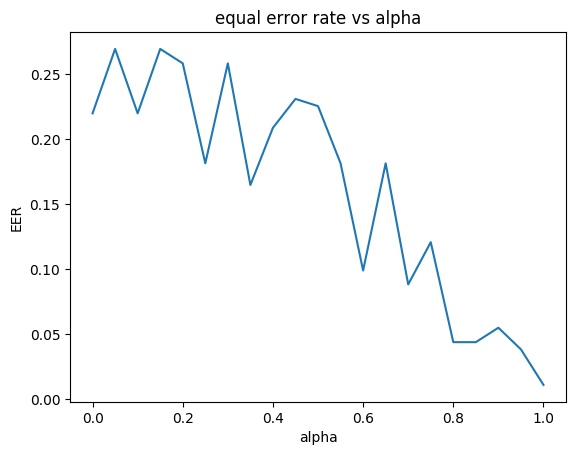

In [20]:
f = figure()
plot(alphavec, eervec)
title("equal error rate vs alpha")
xlabel("alpha")
ylabel("EER")
show()